In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('movie_metadata.csv')
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
dataset.drop(['color','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating','title_year'], axis = 1, inplace=True)

In [4]:
dataset.drop_duplicates(inplace = True)

In [5]:
dataset.drop('facenumber_in_poster', axis = 1, inplace = True)

In [6]:
dataset.shape

(4998, 14)

In [7]:
dataset.dropna(inplace = True)

In [8]:
dataset = dataset.loc[(dataset!=0.0).all(axis=1)]

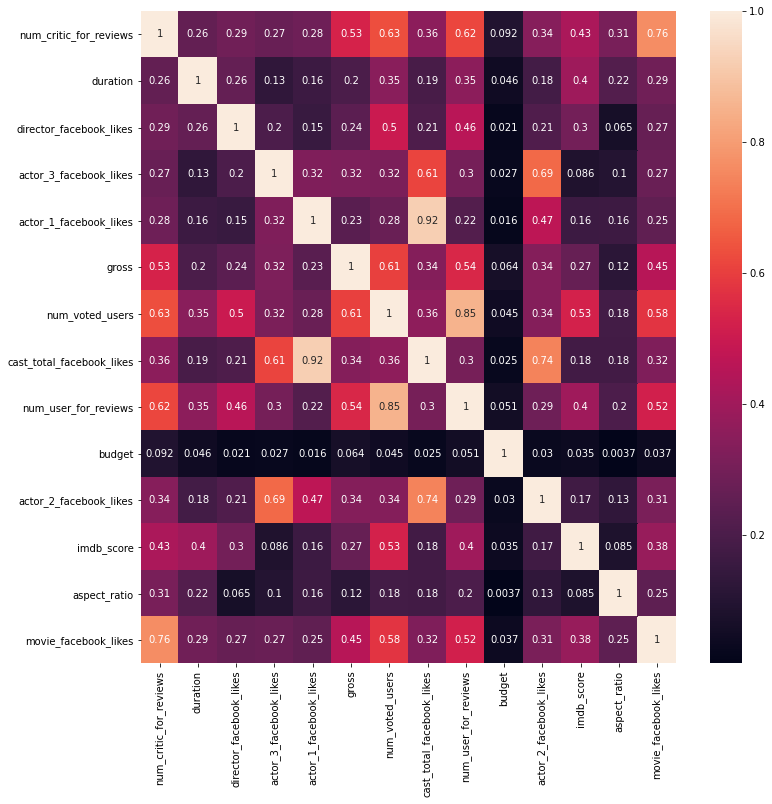

In [9]:
corr_matrix = dataset.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [10]:
dataset.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,2.35,24000
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,387.0,260000000.0,553.0,7.8,1.85,29000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,973.0,250000000.0,11000.0,7.5,2.35,10000
13,313.0,151.0,563.0,1000.0,40000.0,423032628.0,522040,48486,1832.0,225000000.0,5000.0,7.3,2.35,5000


In [11]:
X = dataset.drop(columns=['imdb_score'])
X
y = dataset['imdb_score']
y
X = np.array(X)
y = np.array(y)
y.shape
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler_x = StandardScaler()
#X = scaler_x.fit_transform(X)
#scaler_y = StandardScaler()
#y = scaler_x.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100)
RandomForest_model.fit(X_train, y_train)
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.6642780857441006

In [12]:
y_pred=RandomForest_model.predict(X_test)

In [13]:
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 0.6731361315021965
